# QFT using Digital Analog Quantum Computation

![Z-counting](https://learn.qiskit.org/content/v2/ch-algorithms/images/zbasis-counting.gif "z-counting")
![QFT-counting](https://learn.qiskit.org/content/v2/ch-algorithms/images/fourierbasis-counting.gif "qft-counting")

QFT operation is:
$$QFT|j\rangle = \frac{1}{2^{n/2}} \sum_{k=0}^{2^n-1}{e^{2\pi ijk/{2^n}}}|k\rangle$$

Unitary for QFT can be defined as:
$$ U_{QFT} = \frac{1}{2^{n/2}} \sum_{k=0}^{2^n-1}{e^{2\pi ijk/{2^n}}}|k\rangle \langle j|$$

## Simplifying QFT operation to superposition of all qubits:

$$QFT_N|x\rangle = \frac{1}{2^{n/2}} \sum_{y=0}^{2^n-1}{e^{2\pi ix\color{red}{y/{2^n}}}}|y\rangle$$

rewriting $y=y_1y_2y_3...y_n$ 

and $y/2^n=\sum_{k=1}^{n}{y_k/2^k}$
$$QFT_N|x\rangle = \frac{1}{2^{n/2}} \sum_{y=0}^{2^n-1}{e^{2\pi ix \color{red}{\sum_{k=1}^{n}{y_k/2^k}}}} \color{red}{|y_1,y_2,y_3...y_n\rangle}$$,

Exponent to the sum is just product of exponents: $a^{m+n}=a^ma^n$

Therefore,
$$QFT_N|x\rangle = \frac{1}{2^{n/2}} \sum_{y=0}^{2^n-1} \prod_{k=1}^{n} {e^{2\pi ix \color{red}{y_k/2^k}}} \color{red}{|y_1,y_2,y_3...y_n\rangle}$$,

Expand product:

$$QFT_N|x\rangle = \frac{1}{2^{n/2}} \sum_{y=0}^{2^n-1} {e^{2\pi ix \color{red}{\frac{y_1}{2}}}}{e^{2\pi ix \color{red}{\frac{y_2}{4}}}}{e^{2\pi ix \color{red}{\frac{y_3}{8}}}}...{e^{2\pi ix \color{red}{\frac{y_n}{2^n}}}} \color{red}{|y_1,y_2,y_3...y_n\rangle}$$,

We can expand $\sum_{y=0}^{2^n-1}$ for $y=y_1y_2y_3...y_n$ as $\sum_{y=0}^{2^n-1}{} = \sum_{y_1=0}^{1}{}\sum_{y_2=0}^{1}{}\sum_{y_3=0}^{1}{}...\sum_{y_n=0}^{1}{}$,

$$QFT_N|x\rangle = \frac{1}{2^{n/2}} \sum_{y_1=0}^{1}{}\sum_{y_2=0}^{1}{}\sum_{y_3=0}^{1}{}...\sum_{y_n=0}^{1}{} {e^{2\pi ix \color{red}{\frac{y_1}{2}}}}{e^{2\pi ix \color{red}{\frac{y_2}{4}}}}{e^{2\pi ix \color{red}{\frac{y_3}{8}}}}...{e^{2\pi ix \color{red}{\frac{y_n}{2^n}}}} \color{red}{|y_1,y_2,y_3...y_n\rangle}$$,

This can just be written as a tensor product:

$$QFT_N|x\rangle = \frac{1}{2^{n/2}} \bigotimes_{k = 1}^{n} {(|0\rangle + e^{\frac{2\pi ix}{2^k}}|1\rangle)}$$
$$QFT_N|x\rangle = \frac{1}{2^{n/2}} (|0\rangle + e^{\frac{2\pi ix}{2}}|1\rangle) \bigotimes (|0\rangle + e^{\frac{2\pi ix}{2^2}}|1\rangle) \bigotimes (|0\rangle + e^{\frac{2\pi ix}{2^3}}|1\rangle) \bigotimes .... \bigotimes (|0\rangle + e^{\frac{2\pi ix}{2^n}}|1\rangle) $$

## Designing QFT 

![QFT Circuit](https://learn.qiskit.org/content/v2/ch-algorithms/images/qft.png)

here,$UROT_k$ is applied as a controlled unitary to get $(|0\rangle + e^{\frac{2\pi ix}{2^k}}|1\rangle)$

$$UROT_k = \begin{bmatrix}
    1       & 0 \\
    0       & e^{\frac{2\pi i}{2^k}} \\
\end{bmatrix}$$


Consider input state $|x_1,x_2,x_3,...,x_n\rangle$
After the first application of Hadamard on $|x_1\rangle \rightarrow \frac{1}{\sqrt{2}}{(|0\rangle+e^{\frac{2\pi ix_1}{2}}|1\rangle)}$, if $|x_1\rangle=|0\rangle$, then after applying $H$ we get $\frac{1}{\sqrt{2}}{(|0\rangle+|1\rangle)}$, else, we get $\frac{1}{\sqrt{2}}{(|0\rangle-|1\rangle)}$, i.e. final state depends upon the binary value of $x_1$

$$H_1|x_1,x_2,x_3,...,x_n\rangle = \frac{1}{\sqrt{2}}{(|0\rangle+e^{\frac{2\pi ix_1}{2}}|1\rangle)}\bigotimes|x_2,x_3,...,x_n\rangle$$

After applying $UROT_2$ on qubit 1, the state changes to

$$\frac{1}{\sqrt{2}}{(|0\rangle+exp{(\frac{2\pi ix_1}{2}+\frac{2\pi ix_2}{2^2})}|1\rangle)}\bigotimes|x_2,x_3,...,x_n\rangle$$

After applying last $UROT_n$ gate on qubit 1 we get

$$\frac{1}{\sqrt{2}}{(|0\rangle+exp{(\frac{2\pi ix_1}{2}+\frac{2\pi ix_2}{2^2} + \frac{2\pi ix_3}{2^3} + ... + \frac{2\pi ix_n}{2^n})}|1\rangle)}\bigotimes|x_2,x_3,...,x_n\rangle$$

But $\frac{2\pi ix_1}{2}+\frac{2\pi ix_2}{2^2} + \frac{2\pi ix_3}{2^3} + ... + \frac{2\pi ix_n}{2^n} = \frac{2\pi ix}{2^n}$ in binary expansion

$$\frac{1}{\sqrt{2}}{(|0\rangle+exp{(\frac{2\pi ix}{2^n})}|1\rangle)}\bigotimes|x_2,x_3,...,x_n\rangle$$


AFter applying all the gates, final state will be:

$$\frac{1}{\sqrt{2}}{(|0\rangle+exp{(\frac{2\pi ix}{2^n})}|1\rangle)}\bigotimes \frac{1}{\sqrt{2}}{(|0\rangle+exp{(\frac{2\pi ix}{2^{n-1}})}|1\rangle)} \bigotimes \frac{1}{\sqrt{2}}{(|0\rangle+exp{(\frac{2\pi ix}{2^{n-2}})}|1\rangle)} \bigotimes \frac{1}{\sqrt{2}}{(|0\rangle+exp{(\frac{2\pi ix}{2^{2}})}|1\rangle)} \bigotimes \frac{1}{\sqrt{2}}{(|0\rangle+exp{(\frac{2\pi ix}{2^{2}})}|1\rangle)}$$


This is just the reverse of what we obtained in QFT above.
This can be fixed by applying SWAP gates at the end or using different endian format in our calculation.

In [37]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer
import numpy as np
from qiskit.visualization import plot_histogram

def custom_qft(data_qubits):
    qr_data = QuantumRegister(data_qubits)
    cr_data = ClassicalRegister(data_qubits)
    qc = QuantumCircuit(qr_data,cr_data)
    i = data_qubits
    while i>=1:
        n = i - 1
        qc.h(qr_data[n]) 
        for qubit in range(n):
            qc.cp(np.pi/2**(n-qubit), qr_data[qubit], qr_data[n])
        i = i-1
#     qc.measure(qr_data,cr_data)
    return qc

In [38]:
qc = custom_qft(5)

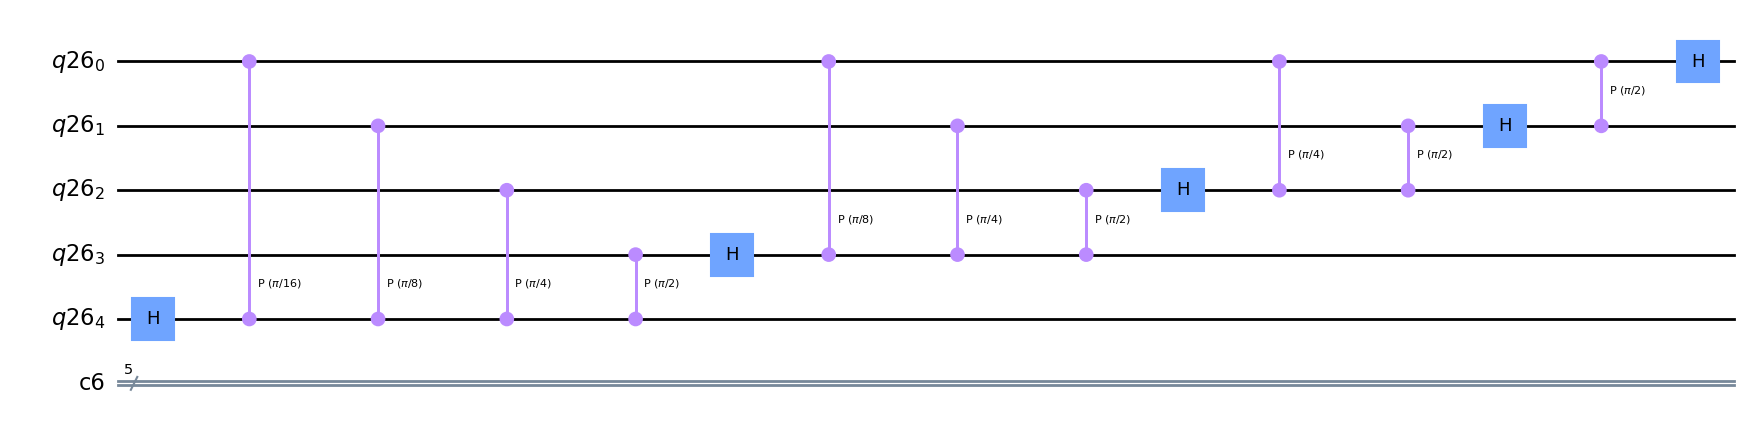

In [39]:
qc.draw(output='mpl')

In [40]:
# backend = BasicAer.get_backend("qasm_simulator")
# counts = execute(qc,shots=1000,backend=backend).result().get_counts()
# counts

In [41]:
# plot_histogram(counts)

In [42]:
backend = BasicAer.get_backend("statevector_simulator")
sv = execute(qc,shots=1000,backend=backend).result().get_statevector()
sv

array([0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j,
       0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j,
       0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j,
       0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j,
       0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j,
       0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j,
       0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j,
       0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j,
       0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j,
       0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j,
       0.1767767-2.77555756e-17j, 0.1767767-2.77555756e-17j,
       0.1767767-1.38777878e-17j, 0.1767767-1.38777878e-17j,
       0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j,
       0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j,
       0.1767767-2.77555756e-17j, 0.1767767-2.77555756e-17j,
       0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j])

In [47]:
import qiskit.quantum_info as qi
state = qi.Statevector.from_instruction(qc)
state.draw(output='latex') 

<IPython.core.display.Latex object>